In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # attractive and informative statistical graphs
import matplotlib.pyplot as plt # for interactive 2D graphics
%pylab inline

import nltk # natural language processing 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC # Support Vector Machines
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
# Obtaining the Data
review= pd.read_csv('yelp_review1.csv', sep=",", header=0, index_col=0)
tip = pd.read_csv('yelp_tip.csv', sep=",", header=0, index_col=0)
business = pd.read_csv('yelp_business.csv', sep=",", header=0, index_col=0)

# Exploring the Data

In [5]:
review.head()

,date,review_id,stars,text,type,user_id,cool,useful,funny
business_id,,,,,,,,,
9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
review.shape

(10000, 9)

In [7]:
# Check if any null values
review.isnull().any()

date         False
review_id    False
stars        False
text         False
type         False
user_id      False
cool         False
useful       False
funny        False
dtype: bool

In [8]:
# Display the statistical overview of the review
review.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [9]:
business.head()

,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
business_id,,,,,,,,,,,,
FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [10]:
tip.head()

,date,likes,business_id,user_id
text,,,,
Great breakfast large portions and friendly waitress. I highly recommend it,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
Nice place. Great staff. A fixture in the township forever,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
"Parking is a premium, keep circling, you will eventually find a great spot",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


# Count of stars and a barchart of it 

Text(0.5,1,'Count of each star rating')

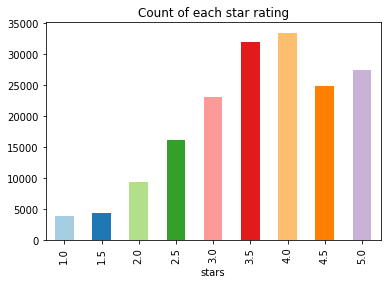

In [11]:
business['stars'].groupby(business['stars']).count().plot(kind="bar", sort_columns=True,color=[plt.cm.Paired(np.arange(len(review)))])
plt.title('Count of each star rating')

The barplot shows that the average star rating of a business is mostly spread accross 3.5 to 5 stars, which means the star rating is more inclined towards greater than 3 stars which means that the number of businesses receiving good ratings exceeds the busineses having low ratings.

# Top 10 cities with most business reviews.

Text(0.5,1,'Top 10 citieswith most reviews')

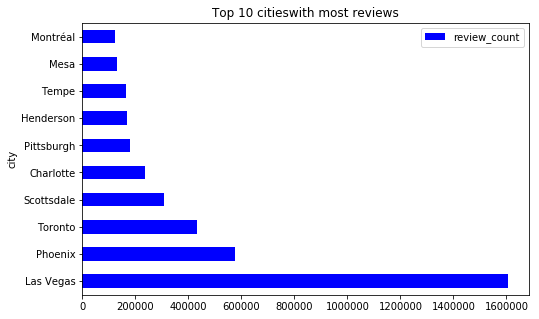

In [12]:
Extract_data=business[['stars','review_count','city']].groupby(['city']).agg({'review_count': 'sum'}).sort_values(by='review_count', ascending=False)
Extract_data2 = Extract_data.head(10)
Extract_data2.plot(kind='barh', stacked=False, figsize=[8,5], colormap='winter')
plt.title('Top 10 citieswith most reviews')

These are the top 10 cities which received maximun number of reviews and average of more than 3 stars for their businesses.

# Lowest 25 businesses which are reviewed least

In [13]:
business[['name', 'review_count', 'city', 'stars']].sort_values(ascending=True, by="review_count")[0:25]

,name,review_count,city,stars
business_id,,,,
Anoq74Y5viXidW_Xw9MC9w,"""Cindy's Alterations & Custom Designs""",3,Whitby,5.0
jssu1TuRVEEyCYDReaCfqQ,"""SK's Kitchen""",3,Mississauga,4.5
PTlGjXvNNsuMnWMW07ruMA,"""Boba & Donuts""",3,Tempe,4.5
4Hc6q-tvVgDlNmEeIJoVuQ,"""AcmeOffice""",3,Las Vegas,5.0
J04fDQl-OkeXKFh3Y9oLEQ,"""Modele de Anna""",3,Euclid,3.5
8nE8gGjsXoFgj2pwVxwGoA,"""Berk's Menswear & Tuxedo Shop""",3,Irwin,4.5
jij8h3uL2F1SbCpqirrG5g,"""Amritsar Tandoori Restaurant""",3,Kirkcaldy,5.0
fAbTXzVryMkSNoKwL1BZ3A,"""Postal Connections""",3,North Las Vegas,5.0
YwB1gq5q2WhCnCBwsembgw,"""Beauty Exchange""",3,Toronto,4.5


These businesses are reviewed least by the people, inspite of excellent star ratings for most of them. The owners of the businesses should concentrate more on their customers and ask them to give reviews about their servies.

# Analysis of wheather the tips are positive or negatvie

In [15]:
tip = tip.reset_index()
analysis_words = [ 'great', 'love','amazing' , 'excellent','awesome', 'nice', 'bad', 'horrible', 'terrible', 
                  'awful', 'hate', 'pathetic']
my_vectorize = CountVectorizer(vocabulary=analysis_words, lowercase=False)
analysis_wc = my_vectorize.fit_transform(tip['text'].values.astype('U'))

Text(0.5,1,'Count of positive and negative words in reviews ')

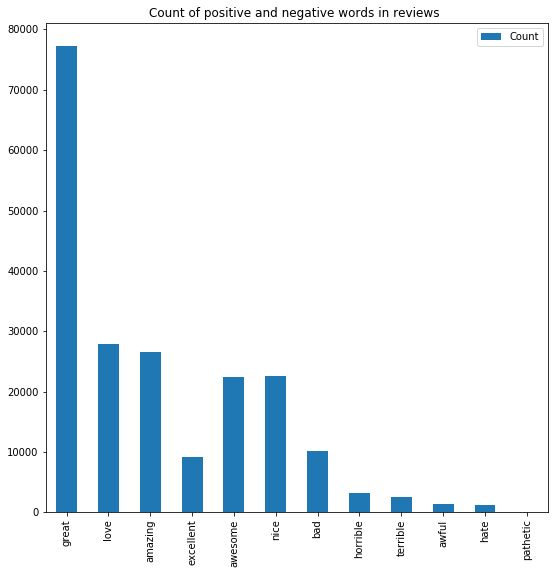

In [17]:
my_vectorize.get_feature_names()
wc_array = analysis_wc.toarray()
wc_array.sum(axis=0)
ccount = pd.DataFrame(index=my_vectorize.get_feature_names(), data=wc_array.sum(axis=0)).rename(columns={0: 'Count'})
ccount.plot(kind='bar', stacked=False, figsize=[9,9])
plt.title('Count of positive and negative words in reviews ')

The barchat shows that there is more usage of positive words then negative one's. Which can be used to imply that our dataset contains more positive reviews than negative reviews.

# FInding the correlation between review types

In [18]:
review['review len']= review['text'].apply(len)
Analysis11= review.groupby('stars').mean()
Analysis11.corr()

,cool,useful,funny,review len
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
review len,-0.857664,0.699881,0.843461,1.000000


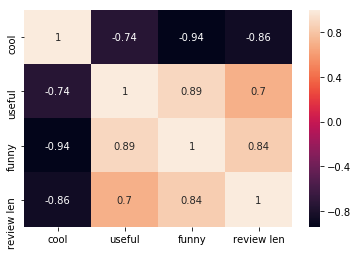

In [19]:
sns.heatmap(data=Analysis11.corr(), annot=True)

This correlation plot shows that except for cool, all the other factors are strongly correlated with each other.

# Prediction of wheather a review is good or bad by applying sentiment analysis.

In [20]:
review_new = review[(review['stars']==1) | (review['stars']==5)]
review_new['stars']= review_new[['stars']].replace(1,'BAD REVIEW')
review_new['stars'] = review_new[['stars']].replace(5,'EXCELLENT REVIEW')
x = review_new['text']
y = review_new['stars']

C:\Users\agraw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\agraw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
from nltk.tokenize import RegexpTokenizer
import string
def remove_stopwords(text):

    remove_punc = [char for char in text if char not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    
    return [word for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

#This function removes the stopwords such as 'a', 'an', 'the', 'this' , etc., from our review text and also removes the punctuations. 

In [22]:
token_count = CountVectorizer(analyzer= remove_stopwords).fit(x) 
#This converts the list of our tokens as vectors and here our function works as an analyser.

In [23]:
X = token_count.transform(x)

# Prediction using Naive Bayes Theorem 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
naive_b = MultinomialNB()
naive_b.fit(X_train, y_train)
prediction_frame = naive_b.predict(X_test)
# We are storing the reviews of our test set in a new datframe.

In [25]:
for i in range(len(review_new['text'])):
    try_review= review_new['text'][i]
    review_transformed = token_count.transform([try_review])
    print('Review',i,"\t",try_review[0:60],"....", "\t", naive_b.predict(review_transformed)[0],"\n")

Review 0 	 My wife took me here on my birthday for breakfast and it was .... 	 EXCELLENT REVIEW 

Review 1 	 I have no idea why some people give bad reviews about this p .... 	 EXCELLENT REVIEW 

Review 2 	 Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very co .... 	 EXCELLENT REVIEW 

Review 3 	 General Manager Scott Petello is a good egg!!! Not to go int .... 	 EXCELLENT REVIEW 

Review 4 	 Drop what you're doing and drive here. After I ate here I ha .... 	 EXCELLENT REVIEW 

Review 5 	 Nobuo shows his unique talents with everything on the menu.  .... 	 EXCELLENT REVIEW 

Review 6 	 The oldish man who owns the store is as sweet as can be.  Pe .... 	 EXCELLENT REVIEW 

Review 7 	 Wonderful Vietnamese sandwich shoppe. Their baguettes are gr .... 	 EXCELLENT REVIEW 

Review 8 	 They have a limited time thing going on right now with BBQ c .... 	 EXCELLENT REVIEW 

Review 9 	 okay this is the best place EVER! i grew up shopping at the  .... 	 EXCELLENT REVIEW 

Review 10 	 This pla

Review 88 	 AZ-88 is at once chic, urban, fun, and just enough Scottsdal .... 	 EXCELLENT REVIEW 

Review 89 	 Fun, with caps if I did that sort of thing. The whole experi .... 	 EXCELLENT REVIEW 

Review 90 	 Who dosen't like Cosco, I love this place. The pizza is chea .... 	 EXCELLENT REVIEW 

Review 91 	 A group of us from the IVAA Summit went to Zinburger last ni .... 	 EXCELLENT REVIEW 

Review 92 	 I love this restaurant (even though it's a chain and I can h .... 	 EXCELLENT REVIEW 

Review 93 	 On one of my many visits to see mi amore, he took me to this .... 	 EXCELLENT REVIEW 

Review 94 	 The pizza is my favorite in Phoenix.  It is light, airy and  .... 	 EXCELLENT REVIEW 

Review 95 	 Wednesday 7pm.  This place is your average over priced, lack .... 	 EXCELLENT REVIEW 

Review 96 	 I had not been to an Oregano's in like 10 years. They seems  .... 	 BAD REVIEW 

Review 97 	 I was a regular at Mia's first location in Wrigleyville/Chic .... 	 EXCELLENT REVIEW 

Review 98 	 Exce

Review 172 	 Once again Wildflower proves why it's my favorite breakfast  .... 	 EXCELLENT REVIEW 

Review 173 	 There are no words to express the value of the quality of se .... 	 EXCELLENT REVIEW 

Review 174 	 Food middle of the road... The staff is rude.. Seems like it .... 	 BAD REVIEW 

Review 175 	 If there was a way I could give this restaurant NO stars, I  .... 	 BAD REVIEW 

Review 176 	 I have been here many times, pretty much can't go wrong here .... 	 EXCELLENT REVIEW 

Review 177 	 As an artist, I've come to be very picky about the stores fr .... 	 EXCELLENT REVIEW 

Review 178 	 So yummy in my tummy. My sister and I went here for dinner a .... 	 EXCELLENT REVIEW 

Review 179 	 LOVE the food!!!! .... 	 EXCELLENT REVIEW 

Review 180 	 I am a huge Suns fan but my review is about the fundraising  .... 	 EXCELLENT REVIEW 

Review 181 	 These guys helped me out with my rear windshield wiper.  The .... 	 EXCELLENT REVIEW 

Review 182 	 Eating in is a decent experience, but for 

Review 261 	 Piestewa and Camelback Peaks are the two boobs of Phoenix. T .... 	 EXCELLENT REVIEW 

Review 262 	 I just love Chipotle. Fresh, yummy, spicy (if you want it to .... 	 EXCELLENT REVIEW 

Review 263 	 I love you, Marquee Theatre. 

Just last night I saw Dashboa .... 	 EXCELLENT REVIEW 

Review 264 	 Their food was GREAT! I had the pancit, lumpia, and that pur .... 	 EXCELLENT REVIEW 

Review 265 	 FINALMENTE!!!

Andiamo....

FOOD
--------
Appetizer: Fritto  .... 	 EXCELLENT REVIEW 

Review 266 	 This has by far been my favorite movie theater and favorite  .... 	 EXCELLENT REVIEW 

Review 267 	 If you've read some of my other reviews you'll see a trend.  .... 	 EXCELLENT REVIEW 

Review 268 	 Let's be honest, when you walk into a tanning salon if you h .... 	 EXCELLENT REVIEW 

Review 269 	 This place really made a terrible situation as easy as possi .... 	 EXCELLENT REVIEW 

Review 270 	 OK, yeah, everyone LOVES teriyaki, we know!

Well, don't so  .... 	 EXCELLENT REVIEW 



Review 350 	 Covet is an excellent clothing store.
In Arizona, there is a .... 	 EXCELLENT REVIEW 

Review 351 	 Boy is the name a temptation.Seriously :)  I'll try to be fa .... 	 BAD REVIEW 

Review 352 	 When I was in highschool various clubs used to sell Karsh's  .... 	 BAD REVIEW 

Review 353 	 Love, love, love! Service is always fabulous and every dish  .... 	 EXCELLENT REVIEW 

Review 354 	 This place pushes out some delicious food, Red chile burro w .... 	 EXCELLENT REVIEW 

Review 355 	 First off, the restaurant is dim and dark.. I thought the de .... 	 BAD REVIEW 

Review 356 	 My husband and I have been going here for a few years now. I .... 	 EXCELLENT REVIEW 

Review 357 	 I came here after receiving a free pizza at a Yelp event.  U .... 	 EXCELLENT REVIEW 

Review 358 	 Yes it is bad for you. Yes it is delicious. Great customer s .... 	 EXCELLENT REVIEW 

Review 359 	 I love pita Jungle! Everytime I am in town, I make it a poin .... 	 EXCELLENT REVIEW 

Review 360 	 I lov

Review 441 	 The Westin Kierland is a beautiful resort located in PHOENIX .... 	 EXCELLENT REVIEW 

Review 442 	 Sprouts is my favorite market to shop at! They are a great c .... 	 EXCELLENT REVIEW 

Review 443 	 Went to Fatburger with our family tonight and will not retur .... 	 BAD REVIEW 

Review 444 	 I love this place.  Great food, great service from some of t .... 	 EXCELLENT REVIEW 

Review 445 	 I had the pleasure of living across the street from this tre .... 	 EXCELLENT REVIEW 

Review 446 	 I was looking into gyms around the area. Upon entering I was .... 	 BAD REVIEW 

Review 447 	 Great and has been for years.  Lines out the doors at lunch  .... 	 EXCELLENT REVIEW 

Review 448 	 Another great Italian find!

My BF and I went to Roma Garden .... 	 EXCELLENT REVIEW 

Review 449 	 Love this place...can't beat it for a healthy meal. Tons of  .... 	 EXCELLENT REVIEW 

Review 450 	 Agree with those who describe this place as enchanting.  The .... 	 EXCELLENT REVIEW 

Review 451 	

Review 529 	 Dilly Dally My Willy Wacky
By The Rue

Why do I always forge .... 	 EXCELLENT REVIEW 

Review 530 	 Anything I write will not do justice to this awesome, awesom .... 	 EXCELLENT REVIEW 

Review 531 	 Man oh man... I can't decide whether I want to review this p .... 	 BAD REVIEW 

Review 532 	 I brought in six pairs of shoes to Ariel to see if he could  .... 	 EXCELLENT REVIEW 

Review 533 	 Best nights to go to Postino's are Mondays and Tuesdays.  Th .... 	 EXCELLENT REVIEW 

Review 534 	 I agree with Tracy, my wife and I are big fans of Fiorella's .... 	 EXCELLENT REVIEW 

Review 535 	 Best UNIQUE breakfast / brunch / lunch spot.  This tiny plac .... 	 EXCELLENT REVIEW 

Review 536 	 Places like Made make me realize that there is hope for my l .... 	 EXCELLENT REVIEW 

Review 537 	 Lately I have been addicted to a good Caprese style sandwich .... 	 EXCELLENT REVIEW 

Review 538 	 A great place for midday healthy food, thin crust good pizza .... 	 EXCELLENT REVIEW 

Review

Review 615 	 I can now thank the Humane Society for not only giving me my .... 	 EXCELLENT REVIEW 

Review 616 	 Awesome, awesome, awesome....everything was fantastic. The i .... 	 EXCELLENT REVIEW 

Review 617 	 Hole-in-the-Rock is a cave-like natural rock formation sculp .... 	 EXCELLENT REVIEW 

Review 618 	 Flatiron Mesa is one of my favorite hikes in the Phoenix are .... 	 EXCELLENT REVIEW 

Review 619 	 I've been going to Lake Pleasant Dentistry for 2-3 years now .... 	 EXCELLENT REVIEW 

Review 620 	 What happened to this place?  The food was good and seemed t .... 	 EXCELLENT REVIEW 

Review 621 	 Pleasant, courteous,  low prices and your clothes are ready  .... 	 EXCELLENT REVIEW 

Review 622 	 It's pretty awesome here!  I was traveling in Phoenix for wo .... 	 EXCELLENT REVIEW 

Review 623 	 Went here for the first time a few weeks ago and it was some .... 	 EXCELLENT REVIEW 

Review 624 	 I went in at 8 on a Thursday night, and the place was pretty .... 	 EXCELLENT REVIEW 



Review 703 	 Was looking for a nice dinner place in Peoria to send my mom .... 	 EXCELLENT REVIEW 

Review 704 	 great food... HUGE wine list (same as Kashmere)...  whatever .... 	 EXCELLENT REVIEW 

Review 705 	 Very delicious food without long waits! The staff is very fr .... 	 EXCELLENT REVIEW 

Review 706 	 One word: PISTACHIO...
in all its glory...
no need to say mo .... 	 EXCELLENT REVIEW 

Review 707 	 When I first stepped into Smeeks, my entire face lit up, I w .... 	 EXCELLENT REVIEW 

Review 708 	 Honestly the drinks are overpriced and have a hint of rubbin .... 	 BAD REVIEW 

Review 709 	 This review corresponds to my first Check-In to Oregano's. 
 .... 	 EXCELLENT REVIEW 

Review 710 	 Excellent brunch food and great Bloody Marys! They make thei .... 	 EXCELLENT REVIEW 

Review 711 	 Chopped Salad was fabulous, as was the lamb burger. Service  .... 	 EXCELLENT REVIEW 

Review 712 	 Visited this restaurant last week with a groupon special, no .... 	 EXCELLENT REVIEW 

Review

Review 789 	 My mom had purchased a Groupon for this place back in March  .... 	 EXCELLENT REVIEW 

Review 790 	 This place is excellent.  Hands down, the best tacos I've ha .... 	 EXCELLENT REVIEW 

Review 791 	 I totally love this place. It reminds me of the old school h .... 	 EXCELLENT REVIEW 

Review 792 	 OVERPRICED & DECEITFUL & RUDE!

I should have read the revie .... 	 BAD REVIEW 

Review 793 	 Great prices and service. The delivery process could be impr .... 	 EXCELLENT REVIEW 

Review 794 	 I have been going here for years.  The staff is always very  .... 	 EXCELLENT REVIEW 

Review 795 	 I have been going to Salon Mila for 12 years.  I will never  .... 	 EXCELLENT REVIEW 

Review 796 	 Buca Di Beppo is literally, italian restaurant hell. You kno .... 	 BAD REVIEW 

Review 797 	 Just did take out.  Great experience.  Easy to place my orde .... 	 EXCELLENT REVIEW 

Review 798 	 As a previous reviewer stated:  "This restaurant is like no  .... 	 EXCELLENT REVIEW 

Review 799 	

Review 881 	 Unlike other reviewers, I didn't like the buffet, though my  .... 	 EXCELLENT REVIEW 

Review 882 	 Just had takeout from here. Amazing as always!!! Had the car .... 	 EXCELLENT REVIEW 

Review 883 	 The chicken was unreal good!  And, the cornbread, just as re .... 	 EXCELLENT REVIEW 

Review 884 	 I am a big fan of this place, either to stop in on a slow Su .... 	 EXCELLENT REVIEW 

Review 885 	 There are 3 choices at ASU for game design. Which one you ch .... 	 EXCELLENT REVIEW 

Review 886 	 Dana, there is no other like Dana!  Even my kids ask to go v .... 	 EXCELLENT REVIEW 

Review 887 	 Great little place in a great little neighborhood. Food was  .... 	 EXCELLENT REVIEW 

Review 888 	 Why am I trying to hide my love...

I'm at Gallo Blanco Cafe .... 	 EXCELLENT REVIEW 

Review 889 	 love the food and the services ,but you neesd to weight at 3 .... 	 EXCELLENT REVIEW 

Review 890 	 We found a bandaid with the panang.  We ordered panang with  .... 	 BAD REVIEW 

Review

Review 968 	 Not only was the music the worst I have ever heard the wait  .... 	 EXCELLENT REVIEW 

Review 969 	 I've always been partial to Harkins Theaters because they ha .... 	 EXCELLENT REVIEW 

Review 970 	 I attended a UYE (Unofficial Yelp Event) here and I have to  .... 	 EXCELLENT REVIEW 

Review 971 	 Avoid this einstein's at all cost. I have been laying in bed .... 	 BAD REVIEW 

Review 972 	 I LOVE love LOVE Coffee Bean.  I have been in love with Coff .... 	 EXCELLENT REVIEW 

Review 973 	 Very good place to eat.. I go here atleast 3 times a week an .... 	 EXCELLENT REVIEW 

Review 974 	 Taste buds went CRRRAAZZYYY!!

Finally made it to the much r .... 	 EXCELLENT REVIEW 

Review 975 	 Dr. Ford is great.  She came highly recommended and I can se .... 	 EXCELLENT REVIEW 

Review 976 	 Everyone point and laugh at the nerd reviewing a convenience .... 	 EXCELLENT REVIEW 

Review 977 	 My co-workers and I refer to this place as "Pizza n' Ants".  .... 	 EXCELLENT REVIEW 

Review

Review 1056 	 This place is the best place I've found so far for sushi in  .... 	 EXCELLENT REVIEW 

Review 1057 	 This company is Awesome!!! I was recommended to go here by a .... 	 EXCELLENT REVIEW 

Review 1058 	 This place does it right, but hold on to your walet! U have  .... 	 EXCELLENT REVIEW 

Review 1059 	 Amazing selection of beers with great tabs educating you on  .... 	 EXCELLENT REVIEW 

Review 1060 	 Just have to rave about Becca and Todd's Zoo tour on a Segwa .... 	 EXCELLENT REVIEW 

Review 1061 	 Absolutely disgusting.  I had enchiladas and a taco, just to .... 	 BAD REVIEW 

Review 1062 	 Fabulous! This was my son- in -laws Restaurant Week choice a .... 	 EXCELLENT REVIEW 

Review 1063 	 Oh Rhythm Room, how I adore thee!

I have seen some of the g .... 	 EXCELLENT REVIEW 

Review 1064 	 Very good place for breakfast & lunch tucked away in the cro .... 	 EXCELLENT REVIEW 

Review 1065 	 Man oh Man!   Since leaving New York six and a half years ag .... 	 EXCELLENT REVIE

Review 1145 	 Next Door Realty is fantastic!  Daradee Murray handled the s .... 	 EXCELLENT REVIEW 

Review 1146 	 We happened upon this place on Sunday. We had our 2 1/2 year .... 	 EXCELLENT REVIEW 

Review 1147 	 Addicted to duck fat fries!  Curry mayo is a perfect complem .... 	 EXCELLENT REVIEW 

Review 1148 	 This is another work lunch takeout place for me and it alway .... 	 EXCELLENT REVIEW 

Review 1149 	 I seriously can't get enough of this spicy goodness! All I e .... 	 EXCELLENT REVIEW 

Review 1150 	 For some reason these self serve frozen yogurt places have p .... 	 EXCELLENT REVIEW 

Review 1151 	 John did a fantastic job on figuring out my overheating issu .... 	 BAD REVIEW 

Review 1152 	 The obsession started about 2 yrs ago and I haven't looked b .... 	 EXCELLENT REVIEW 

Review 1153 	 We've been going here for 25 years and I had my first BAD me .... 	 BAD REVIEW 

Review 1154 	 If you're at all a "Foodie" you can't come to Phoenix, or an .... 	 EXCELLENT REVIEW 

Re

Review 1233 	 I got on the internet and looked at the menu and called in t .... 	 BAD REVIEW 

Review 1234 	 Awesome awesome awesome!!! Our table all ordered a 5 course  .... 	 EXCELLENT REVIEW 

Review 1235 	 If there was a Cantina Laredo in my home (Los Angeles) I wou .... 	 EXCELLENT REVIEW 

Review 1236 	 It is a 110 mile round trip for me, passing who knows how ma .... 	 EXCELLENT REVIEW 

Review 1237 	 I can't even believe I actually went to this restaurant.  My .... 	 BAD REVIEW 

Review 1238 	 Steve is one of the few shops that can still do a decent fla .... 	 EXCELLENT REVIEW 

Review 1239 	 I love the Ranch Market!  The atmosphere is great, the produ .... 	 EXCELLENT REVIEW 

Review 1240 	 Since the Gilbert location has closed. The Tempe location ha .... 	 EXCELLENT REVIEW 

Review 1241 	 Wow... i don't think I've ever been in a more narrow place.. .... 	 EXCELLENT REVIEW 

Review 1242 	 Of the 3 sites - this is the Kindergarten.

My daughter is a .... 	 EXCELLENT REVIEW 

Re

Review 1324 	 I was looking for a place close to where I live for eyebrow  .... 	 EXCELLENT REVIEW 

Review 1325 	 Now open on Saturdays!!!! Yes!!!!! .... 	 EXCELLENT REVIEW 

Review 1326 	 I've been using mineral makeup for a couple years now and Ba .... 	 EXCELLENT REVIEW 

Review 1327 	 When I say a certain food contains ingredients such as blue  .... 	 EXCELLENT REVIEW 

Review 1328 	 Soggy flavorless pizza served on unwarmed ceramic plate. Car .... 	 BAD REVIEW 

Review 1329 	 Special. Not on menu. Chicken strawberry raspberry blackberr .... 	 EXCELLENT REVIEW 

Review 1330 	 Good food at a good price. .... 	 EXCELLENT REVIEW 

Review 1331 	 I went with my sister 2 days ago. It was my first time eatin .... 	 EXCELLENT REVIEW 

Review 1332 	 Water park is OK.  However, the parking lot has ZERO securit .... 	 BAD REVIEW 

Review 1333 	 So, I have to admit that I once threw up in the Pita Jungle  .... 	 EXCELLENT REVIEW 

Review 1334 	 I absolutely love their personal hotpot room! 
I

Review 1410 	 I'm usually one to prefer chicken - but when the only option .... 	 EXCELLENT REVIEW 

Review 1411 	 I had lunch today at CASK 63 with a banker to discuss our co .... 	 EXCELLENT REVIEW 

Review 1412 	 "The office space, layout, presentation gets 5 stars, the cu .... 	 BAD REVIEW 

Review 1413 	 been coming here since birth .... 	 EXCELLENT REVIEW 

Review 1414 	 Well, what a pleasant surprise!  I stopped by with my childr .... 	 EXCELLENT REVIEW 

Review 1415 	 It doesn't matter which location you go to, it's all the sam .... 	 EXCELLENT REVIEW 

Review 1416 	 There's the sweetest (and cutest) guy who works there and on .... 	 EXCELLENT REVIEW 

Review 1417 	 Door clearly says drive-thru open 24 hours and lobby till mi .... 	 BAD REVIEW 

Review 1418 	 Oooh, this is my favorite lunch place by my office.  Super n .... 	 EXCELLENT REVIEW 

Review 1419 	 BEST PANCAKES!!! We want the recipe. They're newly remodeled .... 	 EXCELLENT REVIEW 

Review 1420 	 I have been trying t

Review 1495 	 I went in once looking for Canidae.  Which according to thei .... 	 BAD REVIEW 

Review 1496 	 I love this place!  it's a cultural experience!  I think eve .... 	 EXCELLENT REVIEW 

Review 1497 	 *** I gave this 5 stars based on the best Mexican food I've  .... 	 EXCELLENT REVIEW 

Review 1498 	 I was very disappointed in my encounter with them today.  I  .... 	 BAD REVIEW 

Review 1499 	 pretentious and bad service - attendants are totally clueles .... 	 BAD REVIEW 

Review 1500 	 I play squash racquet's, a sport favored by the east coast " .... 	 BAD REVIEW 

Review 1501 	 Pop the Soda Shop has closed its doors last month. .... 	 BAD REVIEW 

Review 1502 	 The "Cheers" of central Phoenix. .... 	 EXCELLENT REVIEW 

Review 1503 	 We just sold the car we bought at Carmax that spawned the or .... 	 EXCELLENT REVIEW 

Review 1504 	 Welcome to Downtown!  Finally a little area with a few great .... 	 EXCELLENT REVIEW 

Review 1505 	 Ok, these guys get five stars from me for ma

Review 1587 	 Fantastic venue! Province really adds a touch of class and e .... 	 EXCELLENT REVIEW 

Review 1588 	 I took a road trip with the fellas to watch the LA Kings bea .... 	 EXCELLENT REVIEW 

Review 1589 	 Finally, a great place to get breakfast that isn't Denny's o .... 	 EXCELLENT REVIEW 

Review 1590 	 This place has negra modelo on tap.  I would almost give the .... 	 EXCELLENT REVIEW 

Review 1591 	 I took advantage of That's A Wrap for their catering service .... 	 EXCELLENT REVIEW 

Review 1592 	 I personally like this Fry's. I think most of the people tha .... 	 EXCELLENT REVIEW 

Review 1593 	 love love love this place for a second i don't feel like i'm .... 	 EXCELLENT REVIEW 

Review 1594 	 I absolutely love this place!  I've had my birthday here twi .... 	 EXCELLENT REVIEW 

Review 1595 	 A hipster shindig- for day and night- make your meal with TH .... 	 EXCELLENT REVIEW 

Review 1596 	 I had been wanting to come back for a while.  I love this re .... 	 EXCELLENT

Review 1670 	 These are simply the BEST sandwiches and salads. If you like .... 	 EXCELLENT REVIEW 

Review 1671 	 Delicious, clean, great service! 3 hours later and we are st .... 	 EXCELLENT REVIEW 

Review 1672 	 I love this second location in the Royal coffee series as mu .... 	 EXCELLENT REVIEW 

Review 1673 	 TIP #1 to Mesa-Gateway fliers: This is the ONLY bar at the a .... 	 EXCELLENT REVIEW 

Review 1674 	 Truly a great owner who cares about his customers!   I highl .... 	 EXCELLENT REVIEW 

Review 1675 	 I'm so in love with this place :) I tried the pepperoni pizz .... 	 EXCELLENT REVIEW 

Review 1676 	 This place was just... okay. First I'd like to say that my b .... 	 BAD REVIEW 

Review 1677 	 Tried this restaurant with a groupon. Probably would not hav .... 	 EXCELLENT REVIEW 

Review 1678 	 Intense! .... 	 EXCELLENT REVIEW 

Review 1679 	 I really wish I had a dagger to stab myself in the face for  .... 	 BAD REVIEW 

Review 1680 	 A great little spot to find! Fresh, Fres

Review 1758 	 It was family day (the ex and I like to see our son smile) a .... 	 BAD REVIEW 

Review 1759 	 Kona grill is never a disappointment.  Sushi, the regular me .... 	 EXCELLENT REVIEW 

Review 1760 	 I love this place, I want to go to Arizona just to eat here! .... 	 EXCELLENT REVIEW 

Review 1761 	 "If you buy half a duck, you don't get to pick which duck."
 .... 	 EXCELLENT REVIEW 

Review 1762 	 How can something so simple taste sooo good? I wish there we .... 	 EXCELLENT REVIEW 

Review 1763 	 This was the most HORRIBLE floor cleaning I have ever seen!! .... 	 BAD REVIEW 

Review 1764 	 This is my first time trying this place and I had a wonderfu .... 	 EXCELLENT REVIEW 

Review 1765 	 The best staff around! Very friendly and always make sure yo .... 	 EXCELLENT REVIEW 

Review 1766 	 Im a sucker for great libations and the stores that can carr .... 	 EXCELLENT REVIEW 

Review 1767 	 Wow! The Penang Curry (chicken) was absolutely incredible!!  .... 	 EXCELLENT REVIEW 

Re

Review 1844 	 Warning: Douche Bag level CODE RED!

Here's how my experienc .... 	 BAD REVIEW 

Review 1845 	 This is the second time I've eaten here and it was as good i .... 	 EXCELLENT REVIEW 

Review 1846 	 Open Range offers some damn-good home cooking. My family eat .... 	 EXCELLENT REVIEW 

Review 1847 	 One of the perks to being an only child, is "me" time. There .... 	 EXCELLENT REVIEW 

Review 1848 	 This location has closed.  Went by today and found an empty  .... 	 EXCELLENT REVIEW 

Review 1849 	 Just left. I wanted to eat another pizza it was that good.   .... 	 EXCELLENT REVIEW 

Review 1850 	 If I were ever to be executed, I'd want a Meat & Cheese past .... 	 EXCELLENT REVIEW 

Review 1851 	 we keep driving by this place thinking it was just a coffee  .... 	 EXCELLENT REVIEW 

Review 1852 	 Perhaps you've heard of the Library of Congress.  Nice Libra .... 	 EXCELLENT REVIEW 

Review 1853 	 I've got two names for you:  TYLER & MARCO - - superstar ins .... 	 EXCELLENT REVIE

Review 1930 	 Pauli from ATL checking in here.... just for a bit of nostal .... 	 EXCELLENT REVIEW 

Review 1931 	 Off the chainco's! lol

Today my friends and I pondered what .... 	 EXCELLENT REVIEW 

Review 1932 	 A chain, yes. But par for the course, no. 

First of all, th .... 	 EXCELLENT REVIEW 

Review 1933 	 Jason Silberschlag pulls off a pretty amazing thing here in  .... 	 EXCELLENT REVIEW 

Review 1934 	 I'm happy to say that I've incorporated Guedo's into my week .... 	 EXCELLENT REVIEW 

Review 1935 	 Overall I am a big fan of this place... first how can you be .... 	 EXCELLENT REVIEW 

Review 1936 	 Pizza has been delicious and fresh every time I've been ther .... 	 EXCELLENT REVIEW 

Review 1937 	 I love this place. They are so accommodating and the food is .... 	 EXCELLENT REVIEW 

Review 1938 	 The Management Group at this location need to make a better  .... 	 BAD REVIEW 

Review 1939 	 i cant review restaurants in phx and leave out LGO. breakfas .... 	 EXCELLENT REVIE

Review 2016 	 I hardly ever give five star reviews. My experience at Culin .... 	 EXCELLENT REVIEW 

Review 2017 	 I love this place: look for the specials and the different e .... 	 EXCELLENT REVIEW 

Review 2018 	 Always great, fast and consistent!  The service is excellent .... 	 EXCELLENT REVIEW 

Review 2019 	 I have long liked Tempe Maretplace since it has opened.      .... 	 EXCELLENT REVIEW 

Review 2020 	 yummy..  you will love this place.  I love to sit on the pat .... 	 EXCELLENT REVIEW 

Review 2021 	 After bad experience, I will never return.  It is terrible s .... 	 EXCELLENT REVIEW 

Review 2022 	 Bike cabs beware! You've got nothing on this rig! 

Tour de  .... 	 EXCELLENT REVIEW 

Review 2023 	 Was in town for a business meeting and tried to catch a movi .... 	 BAD REVIEW 

Review 2024 	 Costco Travel - My husband and I recently returned from a tr .... 	 EXCELLENT REVIEW 

Review 2025 	 I joined a friend for a two hour evening ride at CCO. We wer .... 	 EXCELLENT REVIE

Review 2103 	 Excellent .... 	 EXCELLENT REVIEW 

Review 2104 	 Seriously, if you're looking for a place to get your knives  .... 	 EXCELLENT REVIEW 

Review 2105 	 Of course it gets hot in the summer. You're going to be watc .... 	 EXCELLENT REVIEW 

Review 2106 	 5 BIG STARS

For service and quality of meal, restaurants re .... 	 EXCELLENT REVIEW 

Review 2107 	 Gymboree, many years ago I brought my first son to Gymboree  .... 	 EXCELLENT REVIEW 

Review 2108 	 Honestly, I can't remember how I found out about Butter & Me .... 	 EXCELLENT REVIEW 

Review 2109 	 Bookmans is Great!  They probably don't need another positiv .... 	 EXCELLENT REVIEW 

Review 2110 	 Outstanding customer service!!! Great camping firewood bags! .... 	 EXCELLENT REVIEW 

Review 2111 	 I LOVE THIS PLACE! It's so nice to be able to eat here whene .... 	 EXCELLENT REVIEW 

Review 2112 	 Just isn't very good.

I don't understand why people give th .... 	 BAD REVIEW 

Review 2113 	 I was visiting Tempe for Ironman 

Review 2189 	 I've been to this Dick's location a bunch of times and I've  .... 	 EXCELLENT REVIEW 

Review 2190 	 I found some great t-shirts for friends here, including one  .... 	 EXCELLENT REVIEW 

Review 2191 	 Excellent wings. I realized how much I miss this place when  .... 	 EXCELLENT REVIEW 

Review 2192 	 The pupusas, yes, the pupusas are great. The loroco with che .... 	 EXCELLENT REVIEW 

Review 2193 	 I had a great experience.  Nice people.   My minnie poodle m .... 	 EXCELLENT REVIEW 

Review 2194 	 Why oh why can't there be one of these closer to my house?!  .... 	 EXCELLENT REVIEW 

Review 2195 	 I'm a big fan of their strawberry water and if I'm looking f .... 	 EXCELLENT REVIEW 

Review 2196 	 I went there with a friend last year after reading so many g .... 	 EXCELLENT REVIEW 

Review 2197 	 I think that they have the BEST pizza in town!!!! Way better .... 	 EXCELLENT REVIEW 

Review 2198 	 What can I say, this place has it all. Great service, a hugh .... 	 EXCELLENT

Review 2277 	 I'm a bit of a snob, I admit it. I generally prefer the full .... 	 EXCELLENT REVIEW 

Review 2278 	 I actually love this place and I always get great service wh .... 	 EXCELLENT REVIEW 

Review 2279 	 Best cupcakes ever. I can't get enough of the Strawberry and .... 	 EXCELLENT REVIEW 

Review 2280 	 Simply the best sandwiches I have ever tasted.

The Mozarell .... 	 EXCELLENT REVIEW 

Review 2281 	 Really as bad as it gets.
Crap food.
Over priced.
Ugly, tast .... 	 EXCELLENT REVIEW 

Review 2282 	 These are some great cheesesteaks. I have come here multipli .... 	 EXCELLENT REVIEW 

Review 2283 	 I work next door, and I love her ! She has done an excellent .... 	 EXCELLENT REVIEW 

Review 2284 	 Excellent food! I do say the service isn't always the best,  .... 	 EXCELLENT REVIEW 

Review 2285 	 Jodi is fantastic!  Extraordinary!  After too many expensive .... 	 EXCELLENT REVIEW 

Review 2286 	 This location is quieter than the one at Arizona Mills Mall. .... 	 EXCELLENT

Review 2361 	 Really great food and service, and it worked out just fine f .... 	 EXCELLENT REVIEW 

Review 2362 	 Polite friendly staff. Great, always clean place.  The gym i .... 	 EXCELLENT REVIEW 

Review 2363 	 I LOVE this place..  This is my sushi bar.  Danny, one of th .... 	 EXCELLENT REVIEW 

Review 2364 	 My friend has raved about this place for months, so for her  .... 	 EXCELLENT REVIEW 

Review 2365 	 Sunflower market is WAY cheaper than Whole Foods and has a l .... 	 EXCELLENT REVIEW 

Review 2366 	 Just when I'm about to give up on my search for good Thai ar .... 	 EXCELLENT REVIEW 

Review 2367 	 This charming little place not only has the BEST custom spra .... 	 EXCELLENT REVIEW 

Review 2368 	 The Boulders was a first class experience all around.  

We  .... 	 EXCELLENT REVIEW 

Review 2369 	 I don't think I have ever been to a restaurant where I have  .... 	 BAD REVIEW 

Review 2370 	 We just moved from Florida and I was looking for a Restauran .... 	 EXCELLENT REVIE

Review 2446 	 Never disappointed with this place!

Get the brisket, get th .... 	 EXCELLENT REVIEW 

Review 2447 	 I think chef Silvana Esparza first located the restaurant he .... 	 EXCELLENT REVIEW 

Review 2448 	 Hospitality Suite Resort was my home away from home this las .... 	 EXCELLENT REVIEW 

Review 2449 	 I LOVE the pretzels! Wish they would bring back the Asiago D .... 	 EXCELLENT REVIEW 

Review 2450 	 I was very impressed with the service and food. St Francis p .... 	 EXCELLENT REVIEW 

Review 2451 	 I've now tried Thai Elephant three times.  My first two expe .... 	 BAD REVIEW 

Review 2452 	 I found the food excellent, but keep in mind this isn't typi .... 	 EXCELLENT REVIEW 

Review 2453 	 RUDE RUDE RUDE
I wanted to book a diner for my wife and I (  .... 	 BAD REVIEW 

Review 2454 	 I love CK's. Their happy hour specials are great, service is .... 	 EXCELLENT REVIEW 

Review 2455 	 Ohhh this is the best place ever! Every thing I have ordered .... 	 EXCELLENT REVIEW 

Re

Review 2533 	 From the outside you wouldn't guess the kind of school it is .... 	 EXCELLENT REVIEW 

Review 2534 	 Believe the hype. That's all I can say. 

This place is the  .... 	 BAD REVIEW 

Review 2535 	 I really like this place... they have great wine... try the  .... 	 EXCELLENT REVIEW 

Review 2536 	 Truckin' Good Food is by far my favorite part of the Ahwatuk .... 	 EXCELLENT REVIEW 

Review 2537 	 Okay, so I admit it. Sometimes I get a stubborn idea about n .... 	 EXCELLENT REVIEW 

Review 2538 	 Not worth comin here. I'm all for food like this but this re .... 	 BAD REVIEW 

Review 2539 	 great service, efficient bartender, the place was packed and .... 	 EXCELLENT REVIEW 

Review 2540 	 The best of all the Harkins. Better array of munchies and re .... 	 EXCELLENT REVIEW 

Review 2541 	 So far, I have been to Lola twice (a Saturday night and Mond .... 	 EXCELLENT REVIEW 

Review 2542 	 This place has really good mexican food and a very nice ambi .... 	 EXCELLENT REVIEW 

Re

Review 2620 	 I have visited a few nail spas in Scottsdale and I like this .... 	 EXCELLENT REVIEW 

Review 2621 	 I have been to a great many Ross store-- and I can safely sa .... 	 EXCELLENT REVIEW 

Review 2622 	 The closest thing I have to a neighborhood pub.  Not bad.

T .... 	 EXCELLENT REVIEW 

Review 2623 	 Saw CAKE there last year.  Nice grass, beautiful venue, grea .... 	 EXCELLENT REVIEW 

Review 2624 	 I really adore this place. They've got some of the best lent .... 	 EXCELLENT REVIEW 

Review 2625 	 I LOVE BURRITO EXPRESS. My fiance has been going with his fr .... 	 EXCELLENT REVIEW 

Review 2626 	 This is probably one of the more unique, trendy looking plac .... 	 EXCELLENT REVIEW 

Review 2627 	 Fantastic place to learn Krav Maga and workout. My two sons  .... 	 EXCELLENT REVIEW 

Review 2628 	 What a dream come true to traipse into this store with my to .... 	 EXCELLENT REVIEW 

Review 2629 	 My wife and I just got married at Blackstone, and I'm still  .... 	 EXCELLENT

Review 2704 	 I ordered my custom made door and it arrived recently for in .... 	 EXCELLENT REVIEW 

Review 2705 	 This is our DEFAULT happy hour.
I won't be reviewing their d .... 	 EXCELLENT REVIEW 

Review 2706 	 Divine,  the Carne Asada was so tasty,  flavorful and tender .... 	 EXCELLENT REVIEW 

Review 2707 	 Worst, slow service ever....especially with almost no one in .... 	 BAD REVIEW 

Review 2708 	 I had not eaten in about 12 hours since we were at the hospi .... 	 BAD REVIEW 

Review 2709 	 I took my kitty to the Beat the Heat low cost spay event and .... 	 BAD REVIEW 

Review 2710 	 I am new to Jamba, however i am surprised at the AMAZING cus .... 	 EXCELLENT REVIEW 

Review 2711 	 I stopped by here last night after the Suns game. It was che .... 	 EXCELLENT REVIEW 

Review 2712 	 Great sports bar!  Shows most UFC, Boxing and WWE pay per vi .... 	 EXCELLENT REVIEW 

Review 2713 	 good place to kill an evening. I used to spend my time here  .... 	 EXCELLENT REVIEW 

Review 2

Review 2790 	 FILLY-B's!!!!!  only 8 reviews?? NINE now!!!

wow do i miss  .... 	 EXCELLENT REVIEW 

Review 2791 	 Definitely one of the best barbers on the westside of town.  .... 	 EXCELLENT REVIEW 

Review 2792 	 If you haven't been to this place - go! Seriously. It's amaz .... 	 EXCELLENT REVIEW 

Review 2793 	 Honey jalapeño chicken lollipops and sweet potato tots are p .... 	 EXCELLENT REVIEW 

Review 2794 	 I have never been treated so rudely in a retail establishmen .... 	 BAD REVIEW 

Review 2795 	 I don't think anyone who gave over a 2 has ever eaten Italia .... 	 BAD REVIEW 

Review 2796 	 I am in love with this place. Everything is delicious. I hav .... 	 EXCELLENT REVIEW 

Review 2797 	 I booked our anniversary trip to the Westin Kierland through .... 	 EXCELLENT REVIEW 

Review 2798 	 I see a lot of four stars...perhaps I'm too generous with my .... 	 EXCELLENT REVIEW 

Review 2799 	 i don't say, too many prayers
saint or sinner, i don't care
 .... 	 EXCELLENT REVIEW 

Re

Review 2873 	 What a great place to hike/ run/ shred! It's a great hike to .... 	 EXCELLENT REVIEW 

Review 2874 	 The BEST Japanese food in AZ! Guaranteed! When you are looki .... 	 EXCELLENT REVIEW 

Review 2875 	 I'm a sucker for a yummy coconut cupcake and Tammie Coe has  .... 	 EXCELLENT REVIEW 

Review 2876 	 Great pizza and awesome must have guacamole pizza appitizer! .... 	 EXCELLENT REVIEW 

Review 2877 	 This place was horrible! I will never go back it was over pr .... 	 BAD REVIEW 

Review 2878 	 Just fantastic. I first went to Cornish Pasty in 05' a few m .... 	 EXCELLENT REVIEW 

Review 2879 	 The castle is what drew us here.  It's just the front of a c .... 	 EXCELLENT REVIEW 

Review 2880 	 This place is over priced and the service is horrible. I wen .... 	 BAD REVIEW 

Review 2881 	 Dave at Dave's Ashtanga is the best yoga teacher. He is kind .... 	 EXCELLENT REVIEW 

Review 2882 	 Just a quick update.... Took my parents here for lunch today .... 	 EXCELLENT REVIEW 

Re

Review 2957 	 I had a great experience with this company today.  They sent .... 	 EXCELLENT REVIEW 

Review 2958 	 I can not believe that pizza could be this good. I had good  .... 	 EXCELLENT REVIEW 

Review 2959 	 This is the most progressive, inclusive, welcoming, diverse, .... 	 EXCELLENT REVIEW 

Review 2960 	 Dr. Ellis is compasionate, caring, and really demonstrates h .... 	 EXCELLENT REVIEW 

Review 2961 	 So happy to have another option in our great restaurant rich .... 	 EXCELLENT REVIEW 

Review 2962 	 Thanks to Chris L's first review, OTFM has been on my list o .... 	 EXCELLENT REVIEW 

Review 2963 	 Ugh!!  

A 25 min wait greeted us before anyone recognized o .... 	 BAD REVIEW 

Review 2964 	 Amazing thrift store! The owner was extremely kind and polit .... 	 EXCELLENT REVIEW 

Review 2965 	 Scale of 1-10 (multiple visits):
10 Food
9 Service
10 Atmosp .... 	 EXCELLENT REVIEW 

Review 2966 	 As a former Bay Area resident, I have come to love and appre .... 	 EXCELLENT REVIE

Review 3043 	 best. grilled. cheese. and. tomato. soup. ever. .... 	 EXCELLENT REVIEW 

Review 3044 	 Along with Bliss, FEZ is another one of my fav brunch spots. .... 	 EXCELLENT REVIEW 

Review 3045 	 i love trader joe's!!! 

i think they're selection of produc .... 	 EXCELLENT REVIEW 

Review 3046 	 Attended the Table 12 Lunch & Learn event with guest Chef Me .... 	 EXCELLENT REVIEW 

Review 3047 	 I've often driven by here, & figured I'd go in & take a look .... 	 BAD REVIEW 

Review 3048 	 As far as gourmet burger joints go, this place is the bomb!  .... 	 EXCELLENT REVIEW 

Review 3049 	 I work across the street and love me some Hava Java. The mor .... 	 EXCELLENT REVIEW 

Review 3050 	 This is the largest urban park. Moreover, that urban part is .... 	 EXCELLENT REVIEW 

Review 3051 	 They get five stars now. You know why? Three little words I  .... 	 EXCELLENT REVIEW 

Review 3052 	 A most unexpected gem! If you are a wine drinker, fabulous f .... 	 EXCELLENT REVIEW 

Review 30

Review 3133 	 I came here for the first time ever on Mother's Day. They we .... 	 EXCELLENT REVIEW 

Review 3134 	 I ate here for the first time a few weeks ago on a Friday ni .... 	 BAD REVIEW 

Review 3135 	 The best !

From my first shredded beef taco almost a year a .... 	 EXCELLENT REVIEW 

Review 3136 	 We showed up out of the blue on Valentine's night looking fo .... 	 EXCELLENT REVIEW 

Review 3137 	 I didn't know what to expect from this store. It was over 10 .... 	 EXCELLENT REVIEW 

Review 3138 	 Absolutely unbelievable!!! This is so worth the drive from S .... 	 EXCELLENT REVIEW 

Review 3139 	 Best Ice cream sandwhich I have ever had .... 	 EXCELLENT REVIEW 

Review 3140 	 Took Maddie here for a quick nail trim, was super impressed. .... 	 EXCELLENT REVIEW 

Review 3141 	 Wow, this place is still here? I went there as a girl (15+ y .... 	 EXCELLENT REVIEW 

Review 3142 	 This is my favorite venue--we've held two events here, and I .... 	 EXCELLENT REVIEW 

Review 3143 	 Ra

Review 3216 	 Okay, did I say bad??
WORSE.
Negative five stars.

From San  .... 	 BAD REVIEW 

Review 3217 	 I grew up in Arizona and we went to Wongs every Sunday after .... 	 EXCELLENT REVIEW 

Review 3218 	 An upscale mexican restaurant in the area seemed like the be .... 	 BAD REVIEW 

Review 3219 	 This is the ONLY place my wife and I will buy furniture from .... 	 EXCELLENT REVIEW 

Review 3220 	 My brother from San Francisco was in town and missing the su .... 	 EXCELLENT REVIEW 

Review 3221 	 I love Taste Of China. I eat here at least once a week. Thei .... 	 EXCELLENT REVIEW 

Review 3222 	 Have been there several times. I'm quite fussy about where I .... 	 EXCELLENT REVIEW 

Review 3223 	 You'll feel like you stepped in a time machine and landed in .... 	 BAD REVIEW 

Review 3224 	 First, I'm sorry this review is lengthy, but i really want p .... 	 BAD REVIEW 

Review 3225 	 This is quite literally the best burger I have ever eaten. T .... 	 EXCELLENT REVIEW 

Review 3226 	 

Review 3306 	 Stephen G. hit the nail on the head - "You buy a peaceful ex .... 	 EXCELLENT REVIEW 

Review 3307 	 This place is great! A coworker and I stopped in for lunch t .... 	 EXCELLENT REVIEW 

Review 3308 	 Great food and drink. The traditional margaritas are the bes .... 	 EXCELLENT REVIEW 

Review 3309 	 I love this location, and I love this product.  

I think th .... 	 EXCELLENT REVIEW 

Review 3310 	 This place is as good as I'd heard.  We came here for a day- .... 	 EXCELLENT REVIEW 

Review 3311 	 Let me begin by telling you about my horribly debilitating f .... 	 EXCELLENT REVIEW 

Review 3312 	 Stinkweeds shaped my formative years.  Really.

I started sh .... 	 EXCELLENT REVIEW 

Review 3313 	 Three cheers to Yelp for helping me find where in the Valley .... 	 EXCELLENT REVIEW 

Review 3314 	 How could you write a bad review about a mountain?  Great si .... 	 EXCELLENT REVIEW 

Review 3315 	 Business takes me out to Mesa yesterday.  After chatting wit .... 	 EXCELLENT

Review 3390 	 So, my friend and I went first to Yasu because we heard it w .... 	 EXCELLENT REVIEW 

Review 3391 	 Tuck Shop is definitely one of my favorite restaurants in Ph .... 	 EXCELLENT REVIEW 

Review 3392 	 This subway is one of the cleanest, and most efficient subwa .... 	 EXCELLENT REVIEW 

Review 3393 	 Its not a standard restaurant as it is in the middle of a gr .... 	 EXCELLENT REVIEW 

Review 3394 	 As one of my fave restaurant's in Scottsdale, the Herb Box i .... 	 EXCELLENT REVIEW 

Review 3395 	 I was referred to Jones Family Dentistry for an emergency pr .... 	 EXCELLENT REVIEW 

Review 3396 	 Being from San Antonio I missed Rudy's so much! This Arizona .... 	 EXCELLENT REVIEW 

Review 3397 	 Sunridge Canyon has been one of my very favorite courses sin .... 	 EXCELLENT REVIEW 

Review 3398 	 Inside the Clarendon Hotel in central Phoenix, Gallo Blanco  .... 	 EXCELLENT REVIEW 

Review 3399 	 I love pueblo pediatric also!  And, also surprised there are .... 	 EXCELLENT

Review 3475 	 This place was AMAZING!  I have stayed in probably over 100  .... 	 EXCELLENT REVIEW 

Review 3476 	 Overcrowded, sprawling mess of a mall (and I normally like m .... 	 BAD REVIEW 

Review 3477 	 Finally had a chance to watch a game here! Just moved to Sur .... 	 EXCELLENT REVIEW 

Review 3478 	 Amanda was very helpful when we looking at the ferrits.....  .... 	 EXCELLENT REVIEW 

Review 3479 	 The bill was 150.00 and that was after a free appetizer coup .... 	 EXCELLENT REVIEW 

Review 3480 	 Well thought-through details make Lux amazeballs. 

The espr .... 	 EXCELLENT REVIEW 

Review 3481 	 The best Burgers in Town!!!!!  I have been hooked on their y .... 	 EXCELLENT REVIEW 

Review 3482 	 AMC Esplanade is by far the most successful navigator of the .... 	 EXCELLENT REVIEW 

Review 3483 	 One star for the most terrible service in recent memory.  Ou .... 	 BAD REVIEW 

Review 3484 	 Entering the store is visually overwhelming. There were so m .... 	 BAD REVIEW 

Review 3

Review 3561 	 Move over Maizie's you've been replaced...for brunch that is .... 	 EXCELLENT REVIEW 

Review 3562 	 This place is home. .... 	 EXCELLENT REVIEW 

Review 3563 	 These guys are great!I  Even though they specialize in Merce .... 	 EXCELLENT REVIEW 

Review 3564 	 HORRIBLE service - did nothing to correct our experience.

O .... 	 BAD REVIEW 

Review 3565 	 wow. this place is a gem.  highly recommend it if you're loo .... 	 EXCELLENT REVIEW 

Review 3566 	 Yum! Healthy selections and delicious flavors! .... 	 EXCELLENT REVIEW 

Review 3567 	 If I could only eat at one place for the rest of my life, it .... 	 EXCELLENT REVIEW 

Review 3568 	 They served us stale rice.  Average main dishes, not as flav .... 	 EXCELLENT REVIEW 

Review 3569 	 Two weeks after I dropped off my computer for service with t .... 	 EXCELLENT REVIEW 

Review 3570 	 i'm not a vegan or a vegetarian, i thoroughly enjoy sinking  .... 	 EXCELLENT REVIEW 

Review 3571 	 Contrary to the reviwers below...I lo

Review 3648 	 Wow. I'm not even going to wait until I'm done before leavin .... 	 BAD REVIEW 

Review 3649 	 Still my most favorite hot dog ever and I think the magic is .... 	 EXCELLENT REVIEW 

Review 3650 	 Healing hands!  A dedicated, professional  therapist/intrica .... 	 EXCELLENT REVIEW 

Review 3651 	 I go there often. Love the food. Love the atmosphere. Great  .... 	 EXCELLENT REVIEW 

Review 3652 	 Went to Sol for restaurant week.  Was less than impressed wi .... 	 BAD REVIEW 

Review 3653 	 Had a wonderful birthday dinner at CIBO last night. This was .... 	 EXCELLENT REVIEW 

Review 3654 	 I was surprised by the depth and distinctness of the olive o .... 	 EXCELLENT REVIEW 

Review 3655 	 Best cajun food in town, not just from a truck.  Phoenix doe .... 	 EXCELLENT REVIEW 

Review 3656 	 Great service, atmosphere and of course great food. My wife  .... 	 EXCELLENT REVIEW 

Review 3657 	 I would not recommend this place to anyone.  I went there lo .... 	 EXCELLENT REVIEW 

Re

Review 3739 	 Going to Desert Botanical Garden is the perfect field trip f .... 	 EXCELLENT REVIEW 

Review 3740 	 This place is awesome. Just bought a loose super powers dark .... 	 EXCELLENT REVIEW 

Review 3741 	 This place gets it right from the moment you walk in the doo .... 	 EXCELLENT REVIEW 

Review 3742 	 My family has been going to Dr. Brittan for 10 years.  He is .... 	 EXCELLENT REVIEW 

Review 3743 	 Love this store! .... 	 EXCELLENT REVIEW 

Review 3744 	 I'm not a big "organic" kind of guy.  I could care less abou .... 	 EXCELLENT REVIEW 

Review 3745 	 After eating chocolate covered bacon for desert (yeah, that' .... 	 EXCELLENT REVIEW 

Review 3746 	 The whole market is awesome.I like that if you did not bring .... 	 EXCELLENT REVIEW 

Review 3747 	 The best fried chicken I have ever had
pork cutlet is not to .... 	 EXCELLENT REVIEW 

Review 3748 	 The food is simple, pure and uncomplicated; you taste (and h .... 	 BAD REVIEW 

Review 3749 	 For frozen yogurt quality,

Review 3829 	 ZERO stars!
I traveled from STL to SFO a few weeks ago (with .... 	 BAD REVIEW 

Review 3830 	 Bad... food was horrible... do not waste your time or money .... 	 BAD REVIEW 

Review 3831 	 Nicely edited selection of mid to high end electronics.    K .... 	 EXCELLENT REVIEW 

Review 3832 	 .:chomp:. this is one .:mmmghgh:. good burger .:sllluuuurrrp .... 	 EXCELLENT REVIEW 

Review 3833 	 I have been looking for a great therapist for a long time.   .... 	 EXCELLENT REVIEW 

Review 3834 	 Just tried this place this afternoon. Very friendly staff &  .... 	 EXCELLENT REVIEW 

Review 3835 	 We ordered $40 worth of pizza for takeout and it took almost .... 	 BAD REVIEW 

Review 3836 	 By far the best taco shop in the valley. Their rolled tacos  .... 	 EXCELLENT REVIEW 

Review 3837 	 I am impressed! I finally got a chance to check out the MIM  .... 	 EXCELLENT REVIEW 

Review 3838 	 I really like this place... 
Taking the advice of Yelp we st .... 	 EXCELLENT REVIEW 

Review 38

Review 3913 	 I now have a sixth Sens for delicious Asian tapas- a genre I .... 	 EXCELLENT REVIEW 

Review 3914 	 I have a serious Banana Republic problem. Rewind time to abo .... 	 EXCELLENT REVIEW 

Review 3915 	 I just had my first Tammie Coe cake last week for my birthda .... 	 EXCELLENT REVIEW 

Review 3916 	 This place is our go to mexican place. I love the hot sauce  .... 	 EXCELLENT REVIEW 

Review 3917 	 Awesome food. Highly recommend. Had gyros platter . Generous .... 	 EXCELLENT REVIEW 

Review 3918 	 One of our favorite restaurants in the Valley! We go here ab .... 	 EXCELLENT REVIEW 

Review 3919 	 Love love love this place. It's a very healthy place to eat  .... 	 EXCELLENT REVIEW 

Review 3920 	 It's a nice newer gym with a good amount of amenities and a  .... 	 EXCELLENT REVIEW 

Review 3921 	 Finally a teriyaki bowl place that does it right.  Nothing a .... 	 EXCELLENT REVIEW 

Review 3922 	 Fantastic venue! The bartenders are nice- the drinks are exc .... 	 EXCELLENT

Review 4001 	 Went here last night when on our last night staying at the H .... 	 EXCELLENT REVIEW 

Review 4002 	 I have to tell you....

I had their Jerk Chicken Plate the o .... 	 EXCELLENT REVIEW 

Review 4003 	 I love this place the more I go to it! The service is comple .... 	 EXCELLENT REVIEW 

Review 4004 	 Quick, friendly, awesome. .... 	 EXCELLENT REVIEW 

Review 4005 	 we only came across this place because an acquaintance recom .... 	 EXCELLENT REVIEW 

Review 4006 	 We love The Olive Tree! We call it 'the grill' We eat there  .... 	 EXCELLENT REVIEW 

Review 4007 	 Mucho Gusto es mucho mierda. 

Let me say first, that the pl .... 	 BAD REVIEW 

Review 4008 	 10:30pm on a Saturday night.  My friend and I try our second .... 	 BAD REVIEW 

Review 4009 	 Of course, they are no La Madeliene, but if you are looking  .... 	 EXCELLENT REVIEW 

Review 4010 	 Went early  to North for the New Year's eve special menu. 3r .... 	 EXCELLENT REVIEW 

Review 4011 	 I was in Vietnam last M

In [57]:
print(confusion_matrix(y_test, prediction_frame))
print(classification_report(y_test, prediction_frame))
final_accuracy = round(accuracy_score(prediction_frame,y_test)*100,2)
print('The model achieved an accuracy of', final_accuracy, '%')

[[129  61]
 [ 26 806]]
                  precision    recall  f1-score   support

      BAD REVIEW       0.83      0.68      0.75       190
EXCELLENT REVIEW       0.93      0.97      0.95       832

     avg / total       0.91      0.91      0.91      1022

The model achieved an accuracy of 91.49 %


# Checking the accuracy of the model

In [34]:
review_pred1 = review_new['text'][11]
review_pred1

'first time my friend and I went there... it was delicious!  The food, garlic knots our favorite and of course the wine!  We will be going back ALOT!'

In [35]:
positive_review1 = token_count.transform([review_pred1])
naive_b.predict(positive_review1)[0]

'EXCELLENT REVIEW'

Looks like our model predicted the correct rating as the review is very positive and it deserves a 5.

In [36]:
review_pred2 = review_new['text'][16]
review_pred2

"Disgusting!  Had a Groupon so my daughter and I tried it out.  Very outdated and gaudy 80's style interior made me feel like I was in an episode of Sopranos.  The food itself was pretty bad.  We ordered pretty simple dishes but they just had no flavor at all!  After trying it out I'm positive all the good reviews on here are employees or owners creating them."

In [37]:
negative_review2 = token_count.transform([review_pred2])
naive_b.predict(negative_review2)[0]

'BAD REVIEW'

In [38]:
review_pred3 = review_new['text'][51]
review_pred3

"Take your money elsewhere, unless you've got kids.  I really try to like this place.  A family member signed me up for the discount card, so I've been going more often, but I just don't love it.  It's simply ok, but the prices are outrageous.  And the sounds and animatronics are a huge distraction from the so-so food.  The cocktails are alright, but, again, the price is not right.  The ony thing fun about the place for an adult is the gift shop and the light-up cocktail glasses (which cost extra.)  I've seen a lot of happy families in here though, so I bet it's better if you have little ones to bring along."

In [39]:
negative_review3 = token_count.transform([review_pred3])
naive_b.predict(negative_review3)[0]

'EXCELLENT REVIEW'

# Logistic Regression

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The model achieved an accuracy of',acc_logreg)

The model achieved an accuracy of 92.47


In [351]:
# for i in range(len(review_new['text'])):
#     try_review= review_new['text'][i]
#     #review_transformed = logreg.predict(X_test)
#     print('Review',i,"\t",try_review[0:50],"....","\t", y_pred[i])

# Random Forest Algorithm

In [43]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The model achieved an accuracy of',acc_randomforest)

The model achieved an accuracy of 87.08


# Support Vector Machine

In [44]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The model achieved an accuracy of',acc_svc)

The model achieved an accuracy of 81.41


In [45]:
# Accuracy table of each model 

In [46]:
models = pd.DataFrame({
    'Model' : ['Naive Bayes' , 'Logistic Regression' , 'SVM', 'Random Forest'],
    'Score' : [final_accuracy, acc_logreg,acc_svc, acc_randomforest]
})
models.sort_values(by='Score', ascending = False)

,Model,Score
1,Logistic Regression,92.47
0,Naive Bayes,91.49
3,Random Forest,87.08
2,SVM,81.41
